# ANOVA using Python

In [31]:
import pandas as pd
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


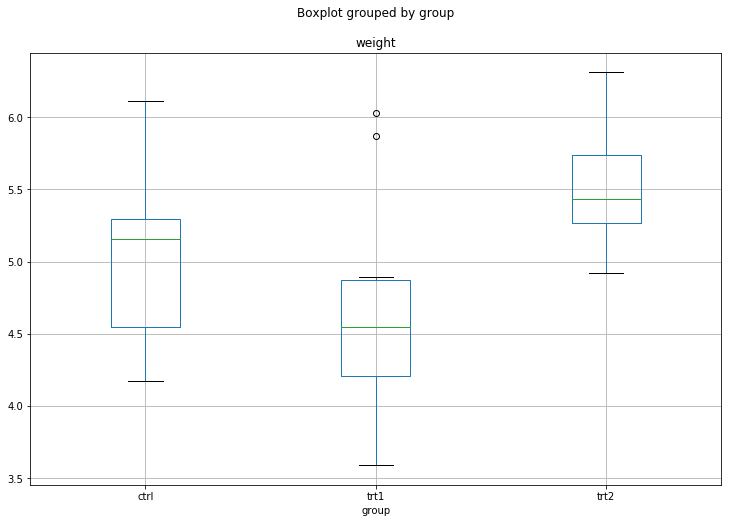

In [10]:
 
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))
 

In [32]:
ctrl = data['weight'][data.group == 'ctrl']
 
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
 
k = len(pd.unique(data.group))           # number of conditions/ treatments/groups; unique: 重复变量数一次；种类数目
N = len(data.values)                               # conditions times participants   TOTAL number
n = data.groupby('group').size()[0]    #Participants in each condition/treatment                    gourpby: 按照那个变量来分组group

## Using SciPy
We start with using SciPy and its method f_oneway from stats.

In [33]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])


In [34]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

In [35]:
### Sum of sqaures between
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n) \
    - (data['weight'].sum()**2)/N
SSbetween

3.766340000000014

In [36]:
## Sum of sqaures within 
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

In [37]:
#sum of total square
SStotal = sum_y_squared - (data['weight'].sum()**2)/N

In [38]:
MSbetween = SSbetween/DFbetween
#Calculation of Mean Square Within

#Mean Square within is also an easy calculation;
MSwithin = SSwithin/DFwithin

#Calculating the F-value
F = MSbetween/MSwithin
p = stats.f.sf(F, DFbetween, DFwithin)  ##求F 分布的p-value!!!!!!
#Finally, we are also going to calculate effect size. We start with the commonly used eta-squared (η² ):

eta_sqrd = SSbetween/SStotal

#However, eta-squared is somewhat biased because it is based purely on sums of squares from the sample. No adjustment is made for the fact that what we aiming to do is to estimate the effect size in the population. Thus, we can use the less biased effect size measure Omega squared:

om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

## Using Statsmodels

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [41]:
#Note, no effect sizes is calculated when we use Statsmodels.  To calculate eta squared we can use the sum of squares from the table:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=3)
print (aov_table)

              sum_sq    df           F        PR(>F)
Intercept  253.21024   1.0  651.602920  1.936575e-20
group        3.76634   2.0    4.846088  1.590996e-02
Residual    10.49209  27.0         NaN           NaN


In [57]:
help(sm.stats.anova_lm)  ###帮助查询函数

Help on function anova_lm in module statsmodels.stats.anova:

anova_lm(*args, **kwargs)
    Anova table for one or more fitted linear models.
    
    Parameters
    ----------
    args : fitted linear model results instance
        One or more fitted linear models
    scale : float
        Estimate of variance, If None, will be estimated from the largest
        model. Default is None.
    test : str {"F", "Chisq", "Cp"} or None
        Test statistics to provide. Default is "F".
    typ : str or int {"I","II","III"} or {1,2,3}
        The type of Anova test to perform. See notes.
    robust : {None, "hc0", "hc1", "hc2", "hc3"}
        Use heteroscedasticity-corrected coefficient covariance matrix.
        If robust covariance is desired, it is recommended to use `hc3`.
    
    Returns
    -------
    anova : DataFrame
    A DataFrame containing.
    
    Notes
    -----
    Model statistics are given in the order of args. Models must have
    been fit using the formula api.
    
   

## Using pyvttbl anova1way

In [53]:
from pyvttbl import DataFrame
 
df=DataFrame()
df.read_tbl(datafile)
# No module named 'base'

aov_pyvttbl = df.anova1way('weight', 'group')
print (aov_pyvttbl)


ModuleNotFoundError: No module named 'base'

In [55]:
help(module_base)

NameError: name 'module_base' is not defined